In [2]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [3]:
from keras.applications import inception_v3
from keras import backend as K
from keras.applications.imagenet_utils import decode_predictions
from keras.preprocessing import image
import numpy as np
K.set_learning_phase(0)

model = inception_v3.InceptionV3(weights='imagenet',include_top=True)

In [4]:
for layer in model.layers:
    #if layer.name.startswith("activation_"):
    print (layer.name)

input_2
conv2d_95
batch_normalization_95
activation_95
conv2d_96
batch_normalization_96
activation_96
conv2d_97
batch_normalization_97
activation_97
max_pooling2d_5
conv2d_98
batch_normalization_98
activation_98
conv2d_99
batch_normalization_99
activation_99
max_pooling2d_6
conv2d_103
batch_normalization_103
activation_103
conv2d_101
conv2d_104
batch_normalization_101
batch_normalization_104
activation_101
activation_104
average_pooling2d_10
conv2d_100
conv2d_102
conv2d_105
conv2d_106
batch_normalization_100
batch_normalization_102
batch_normalization_105
batch_normalization_106
activation_100
activation_102
activation_105
activation_106
mixed0
conv2d_110
batch_normalization_110
activation_110
conv2d_108
conv2d_111
batch_normalization_108
batch_normalization_111
activation_108
activation_111
average_pooling2d_11
conv2d_107
conv2d_109
conv2d_112
conv2d_113
batch_normalization_107
batch_normalization_109
batch_normalization_112
batch_normalization_113
activation_107
activation_109
activa

In [5]:
np.array(model.layers[len(model.layers)-1].get_weights()[0]).shape

(2048, 1000)

In [6]:
activation_layers = [ layer.output for layer in model.layers if layer.name.startswith("activation_")]

In [7]:
layer_names = [ layer.name for layer in model.layers if layer.name.startswith("activation_")]
layer_names

['activation_95',
 'activation_96',
 'activation_97',
 'activation_98',
 'activation_99',
 'activation_103',
 'activation_101',
 'activation_104',
 'activation_100',
 'activation_102',
 'activation_105',
 'activation_106',
 'activation_110',
 'activation_108',
 'activation_111',
 'activation_107',
 'activation_109',
 'activation_112',
 'activation_113',
 'activation_117',
 'activation_115',
 'activation_118',
 'activation_114',
 'activation_116',
 'activation_119',
 'activation_120',
 'activation_122',
 'activation_123',
 'activation_121',
 'activation_124',
 'activation_129',
 'activation_130',
 'activation_126',
 'activation_131',
 'activation_127',
 'activation_132',
 'activation_125',
 'activation_128',
 'activation_133',
 'activation_134',
 'activation_139',
 'activation_140',
 'activation_136',
 'activation_141',
 'activation_137',
 'activation_142',
 'activation_135',
 'activation_138',
 'activation_143',
 'activation_144',
 'activation_149',
 'activation_150',
 'activation_146'

In [8]:
from keras.models import Model
activation_model = Model(inputs=model.input, outputs=activation_layers)

In [45]:
def preprocess_image(image_path):
    img = image.load_img(image_path)
    img = image.img_to_array(img)
    #convert single image to a batch with 1 image
    img = np.expand_dims(img, axis=0)    
    img = inception_v3.preprocess_input(img)
    return img

base_image_path = "mr_blue_sky.jpg"
# Load the image into a Numpy array
img = preprocess_image(base_image_path)

In [46]:
activations = activation_model.predict(img)

In [47]:
print(len(activation_layers))
activations[93].shape

94


(1, 41, 62, 192)

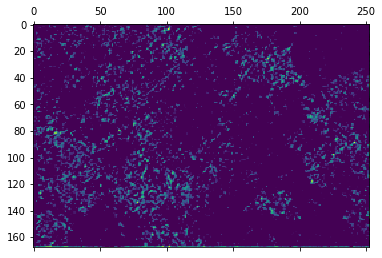

In [48]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.matshow(activations[7][0, :, :, 0], cmap='viridis')
plt.show()

In [49]:
print("Number of Layers", len(activations))

Number of Layers 94


In [55]:
layer_names[92]

'activation_180'

(984, 992)


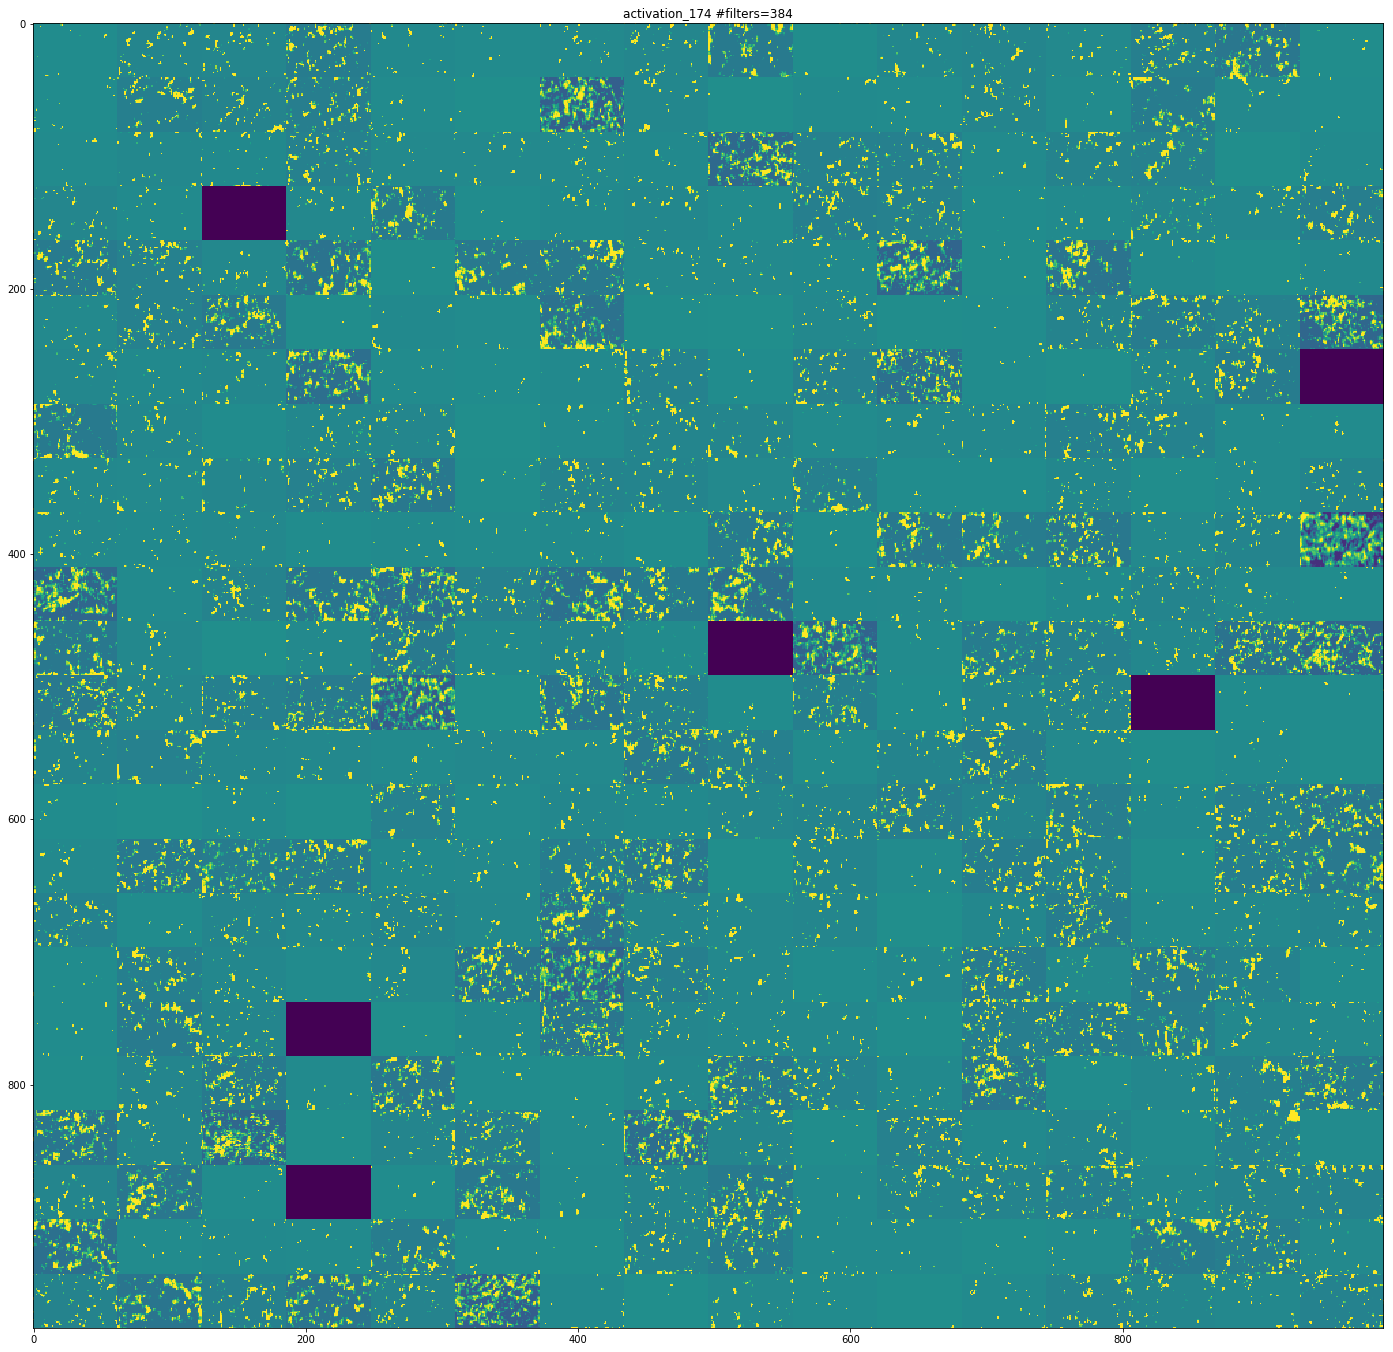

In [56]:
images_per_row = 16
idx = 80
# Now let's display our feature maps
for layer_activation in activations[idx:idx+1]:
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    # The feature map has shape (1, size1, size2, n_features)
    r = layer_activation.shape[1]
    c = layer_activation.shape[2]
    
    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((r * n_cols, images_per_row * c))
    print(display_grid.shape)
    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
            :, :,
            col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * r : (col + 1) * r,
            row * c : (row + 1) * c] = channel_image
    # Display the grid
    scale = 1. / r
    plt.figure(figsize=(scale * display_grid.shape[1],
    scale * display_grid.shape[0]))
    plt.title(layer_names[idx]+" #filters="+str(n_features))
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


In [57]:
images_per_row = 8
idx = 1
# Now let's display our feature maps
layer_activation=activations[idx]
# This is the number of features in the feature map
n_features = layer_activation.shape[-1]
# The feature map has shape (1, size1, size2, n_features)
r = layer_activation.shape[1]
c = layer_activation.shape[2]
    
# We will tile the activation channels in this matrix
n_cols = n_features // images_per_row
display_grid = np.zeros((r * n_cols, images_per_row * c))
print(display_grid.shape)


(2720, 8168)


In [69]:
plt.show()

## CNN Visualization by Gradient Accent

In [59]:
layer_name = 'activation_175'
filter_index = 0
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [60]:
grads = K.gradients(loss, model.input)[0]
# We add 1e-5 before dividing so as to avoid accidentally dividing by 0.
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [61]:
iterate = K.function([model.input], [loss, grads])
# Let's test it:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [62]:
# We start from a gray image with some noise
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.
# Run gradient ascent for 40 steps
step = 1. # this is the magnitude of each gradient update
for i in range(40):
    # Compute the loss value and gradient value
    loss_value, grads_value = iterate([input_img_data])
    # Here we adjust the input image in the direction that maximizes the loss
    input_img_data += grads_value * step

In [63]:
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)
    # convert to RGB array
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [64]:
def generate_pattern(layer_name, filter_index, size=150):
    # Build a loss function that maximizes the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    # Compute the gradient of the input picture wrt this loss
    grads = K.gradients(loss, model.input)[0]
    # Normalization trick: we normalize the gradient
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # This function returns the loss and grads given the input picture
    iterate = K.function([model.input], [loss, grads])
    # We start from a gray image with some noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    # Run gradient ascent for 40 steps
    step = 2.
    for i in range(80):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
        img = input_img_data[0]
    return deprocess_image(img)

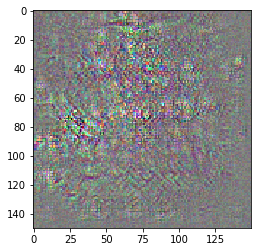

In [65]:
plt.imshow(generate_pattern('activation_183', 1))

In [70]:
plt.show()

In [71]:
idx = 0
layer_name = layer_names[idx]
images_per_row = 8
size = 64
margin = 5

n_features = activation_layers[idx].shape[-1]
n_cols = n_features // images_per_row

In [72]:
n_features, n_cols

(Dimension(32), Dimension(4))

In [73]:

# This a empty (black) image where we will store our results.
results = np.zeros((images_per_row * size + 7 * margin, images_per_row * size + 7 * margin, 3))
for i in range(n_cols): # iterate over the rows of our results grid
    for j in range(images_per_row): # iterate over the columns of our results grid
    # Generate the pattern for filter `i + (j * 8)` in `layer_name`
        filter_img = generate_pattern(layer_name, (i * images_per_row) +j, size=size)
        # Put the result in the square `(i, j)` of the results grid
        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end, vertical_start: vertical_end, :] = filter_img


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


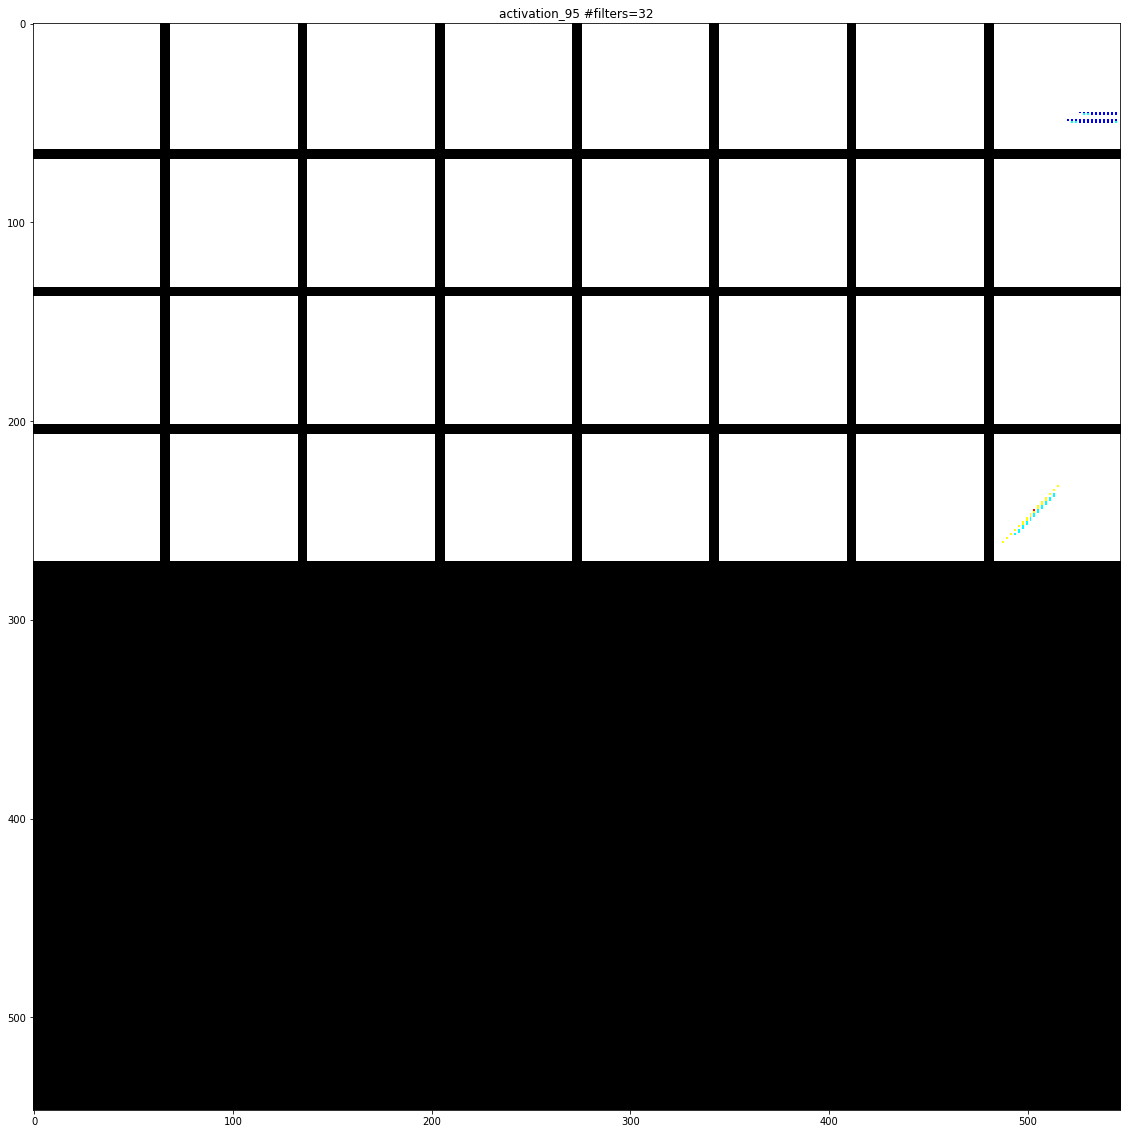

In [74]:
# Display the results grid
plt.figure(figsize=(20, 20))
plt.title(layer_names[idx]+" #filters="+str(n_features))
plt.imshow(results)
plt.show()

## Deep Dream

In [75]:
layer_name = 'activation_185'
activation = model.get_layer(layer_name).output

# We avoid border artifacts by only involving non-border pixels in the loss.
scaling = K.prod(K.cast(K.shape(activation), 'float32'))
loss = K.sum(K.square(activation[:, 2: -2, 2: -2, :])) / scaling

# This holds our generated image
dream = model.input

# Compute the gradients of the dream with regard to the loss.
grads = K.gradients(loss, dream)[0]

# Normalize gradients.
grads /= K.maximum(K.mean(K.abs(grads)), 1e-7)


iterate_grad_ac_step = K.function([dream], [loss, grads])

In [76]:
def gradient_ascent(x, iterations, step, max_loss=None):
    for i in range(iterations):
        loss_value, grad_values = iterate_grad_ac_step([x])
        print('...Loss value at', i, ':', loss_value)
        if max_loss is not None and loss_value > max_loss:
            break        
        x += step * grad_values
    return x

In [83]:
import scipy

def deprocess_image(x):
    # Util function to convert a tensor into a valid image.
    if K.image_data_format() == 'channels_first':
        x = x.reshape((3, x.shape[2], x.shape[3]))
        x = x.transpose((1, 2, 0))
    else:
        x = x.reshape((x.shape[1], x.shape[2], 3))
    x /= 2.
    x += 0.5
    x *= 255.
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def resize_img(img, size):
    img = np.copy(img)
    factors = (1,
               float(size[0]) / img.shape[1],
               float(size[1]) / img.shape[2],
               1)
    return scipy.ndimage.zoom(img, factors, order=1)


def save_img(img, fname):
    pil_img = deprocess_image(np.copy(img))
    scipy.misc.imsave(fname, pil_img)

In [79]:
num_octave = 4 # Number of scales at which to run gradient ascent
octave_scale = 1.4 # Size ratio between scales
iterations = 20 # Number of ascent steps per scale

# If our loss gets larger than 10, 
# we will interrupt the gradient ascent process, to avoid ugly artifacts
max_loss = 20.

base_image_path = 'mr_blue_sky.jpg'
# Load the image into a Numpy array
img = preprocess_image(base_image_path)
print(img.shape)
# We prepare a list of shape tuples
# defining the different scales at which we will run gradient ascent
original_shape = img.shape[1:3]
successive_shapes = [original_shape]
for i in range(1, num_octave):
    shape = tuple([int(dim / (octave_scale ** i)) for dim in original_shape])
    successive_shapes.append(shape)

# Reverse list of shapes, so that they are in increasing order
successive_shapes = successive_shapes[::-1]

# Resize the Numpy array of the image to our smallest scale
original_img = np.copy(img)
shrunk_original_img = resize_img(img, successive_shapes[0])

print(successive_shapes)

(1, 1365, 2048, 3)
[(497, 746), (696, 1044), (975, 1462), (1365, 2048)]


Processing image shape (497, 746)
...Loss value at 0 : 2.5504785
...Loss value at 1 : 2.9313335
...Loss value at 2 : 2.9159703
...Loss value at 3 : 2.9631612
...Loss value at 4 : 3.2344887
...Loss value at 5 : 3.2337048
...Loss value at 6 : 2.9806676
...Loss value at 7 : 3.132364
...Loss value at 8 : 3.0732625
...Loss value at 9 : 3.5243573
...Loss value at 10 : 3.4245956
...Loss value at 11 : 3.6900985
...Loss value at 12 : 3.7328327
...Loss value at 13 : 3.380208
...Loss value at 14 : 3.7325823
...Loss value at 15 : 3.7726333
...Loss value at 16 : 3.924853
...Loss value at 17 : 4.0845675
...Loss value at 18 : 4.488608
...Loss value at 19 : 4.054478
adding lost details (1, 497, 746, 3)
Processing image shape (696, 1044)
...Loss value at 0 : 0.05909765
...Loss value at 1 : 0.16080819
...Loss value at 2 : 0.2923703
...Loss value at 3 : 0.4188177
...Loss value at 4 : 0.46767277
...Loss value at 5 : 0.5171754
...Loss value at 6 : 0.63271207
...Loss value at 7 : 0.59840995
...Loss value at

TypeError: Invalid dimensions for image data

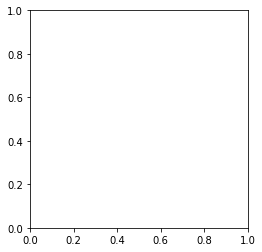

In [84]:
MAX_ITRN = 20
MAX_LOSS = 20
learning_rate = 0.01

for shape in successive_shapes:
    print('Processing image shape', shape)
    img = resize_img(img, shape)
    img = gradient_ascent(img,
                          iterations=MAX_ITRN,
                          step=learning_rate,
                          max_loss=MAX_LOSS)
    upscaled_shrunk_original_img = resize_img(shrunk_original_img, shape)
    same_size_original = resize_img(original_img, shape)
    lost_detail = same_size_original - upscaled_shrunk_original_img
    print('adding lost details', lost_detail.shape)
    img += lost_detail
    shrunk_original_img = resize_img(original_img, shape)
    save_img(img, fname='dream_at_scale_' + str(shape) + '.png')

save_img(img, fname='final_dream.png')

## Heatmaps of class activation

In [85]:
base_image_path = 'mr_blue_sky.jpg'
# Load the image into a Numpy array
img = preprocess_image(base_image_path)

In [86]:
preds = model.predict(img)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 2us/step
Predicted: [('n09288635', 'geyser', 0.010497758), ('n09256479', 'coral_reef', 0.0053552254), ('n09472597', 'volcano', 0.004847582)]


In [87]:
np.argmax(preds[0])

974

In [89]:
# This is the "african elephant" entry in the prediction vector
dog_output = model.output[:, 208]
# The is the output feature map of the `block5_conv3` layer,
# the last convolutional layer in VGG16
last_conv_layer = model.get_layer('activation_135')
# This is the gradient of the "dog" class with regard to
# the output feature map of `activation_94`
grads = K.gradients(dog_output, last_conv_layer.output)[0]